<a href="https://colab.research.google.com/github/MridulMalvi/SMS_spam_predictor/blob/main/SMS_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd


In [31]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [32]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
df.shape

(5572, 5)

In [34]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [35]:
df.sample(5)

,v1,v2
1105,ham,on hen night. Going with a swing
3272,ham,Just finished eating. Got u a plate. NOT lefto...
2089,ham,No i'm not. I can't give you everything you wa...
1064,ham,"That's fine, I'll bitch at you about it later ..."
2202,ham,(And my man carlos is definitely coming by mu ...


In [36]:
# rename coulmn
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [37]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [38]:
df.sample(5)

,target,text
3309,0,Oh ho. Is this the first time u use these type...
2099,1,"SMS SERVICES. for your inclusive text credits,..."
4329,0,i thought we were doing a king of the hill thi...
2104,0,Anyway seriously hit me up when you're back be...
5096,0,But i'm really really broke oh. No amount is t...


In [39]:
#check missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [40]:
# check duplicates
df.duplicated().sum()

np.int64(403)

In [41]:
df.dropna(inplace=True)  # don't assign it to df again
df = df.drop_duplicates()  # now this will work


In [42]:
# EDA
df.value_counts(['target'])

target
0         4516
1          653
Name: count, dtype: int64

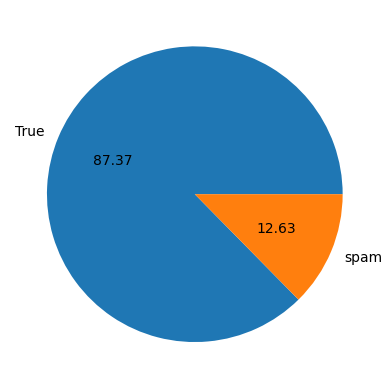

In [43]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['True','spam'],autopct="%0.2f")
plt.show()

In [44]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [45]:
df['num_char']=df['text'].apply(len)

In [46]:
df['num_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [47]:
df['num_senten'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [48]:
df.head()

,target,text,num_char,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [49]:
df[['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# for spam
df[df['target']==1][['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
# for not spam
df[df['target']==0][['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

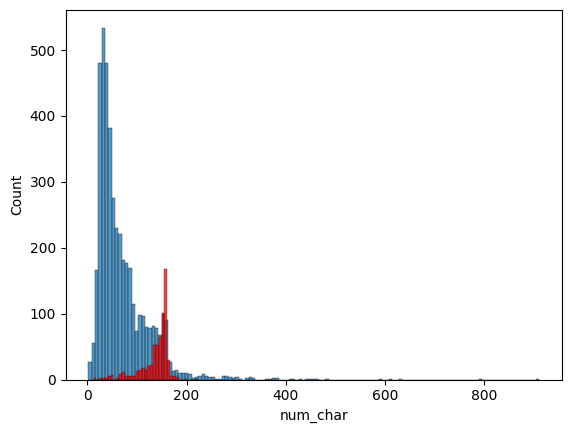

In [52]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: >

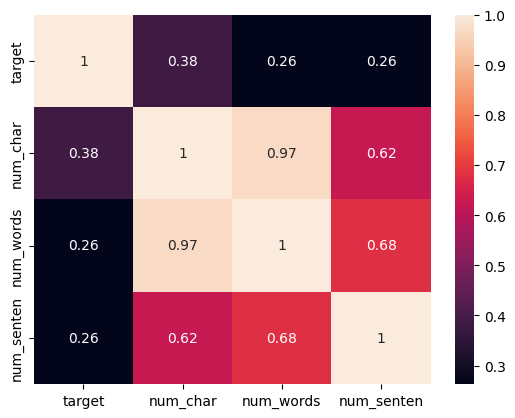

In [53]:
sns.heatmap(df[['target','num_char','num_words','num_senten']].corr(),annot=True)

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
# Data Preprocessing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
df['trans_text']=df['text'].apply(transform_text)

In [65]:
    pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

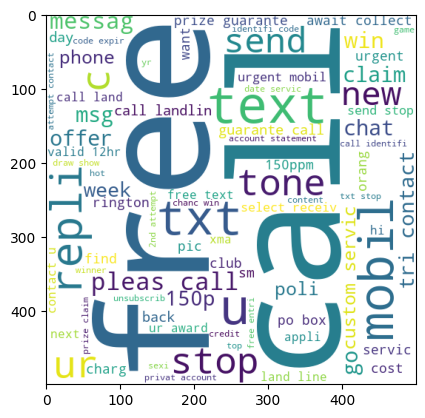

In [68]:
plt.imshow(spam_wc)

In [69]:
spam_corpus = []
for msg in df[df['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


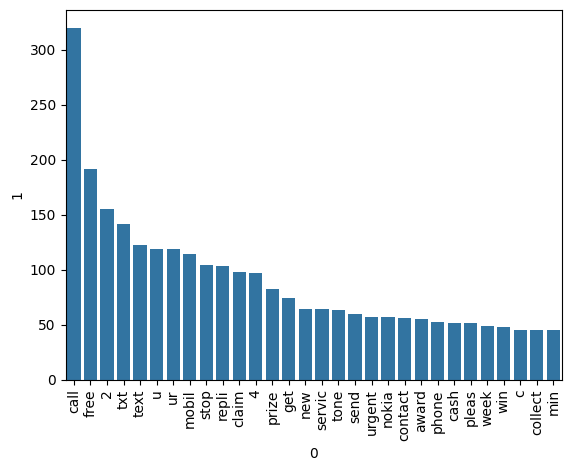

In [70]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Building model

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
#X=cv.fit_transform(df['trans_text']).toarray()

In [72]:
X=Tfidf.fit_transform(df['trans_text']).toarray()

In [73]:
X.shape

(5169, 3000)

In [74]:
y=df['target'].values

In [ ]:
y

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [78]:
#best precision as data imbalance precision matters more then accuracy
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [79]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
lrc = LogisticRegression()
svc = SVC(kernel='sigmoid',gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [82]:
model={      'LR': lrc,
       'SVC' : svc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt}

In [83]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [84]:
accuracy_scores = []
precision_scores = []

for name, model in model.items():

    current_accuracy,current_precision = train_classifier(model, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9545454545454546
Precision -  0.9789473684210527
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307


In [85]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))